###### -----------------START--------------------------------------------

In [1]:
from tqdm import tqdm
import os

In [2]:
import h5py

In [3]:
f = h5py.File('/home/aritra/cric/cric_objects/cric_objects.h5', 'r')

In [4]:
f.keys()

<KeysViewHDF5 ['features', 'object_ids']>

In [5]:
list(f.keys())

['features', 'object_ids']

In [6]:
len(f['features'])

107194

In [7]:
len(f['object_ids'])

107194

In [8]:
f_list = f['features'] 

In [9]:
f_list[0].shape

(100, 2048)

In [10]:
import json

In [11]:
file_path = '/home/aritra/cric/cric_objects_info.json'

In [12]:
with open(file_path, "r") as file:
     data = json.load(file)

In [13]:
data

{'2417970': {'width': 131, 'objectsNum': 18, 'height': 500, 'index': 0},
 '2410800': {'width': 242, 'objectsNum': 22, 'height': 500, 'index': 1},
 '2360609': {'width': 191, 'objectsNum': 24, 'height': 500, 'index': 2},
 '2331673': {'width': 202, 'objectsNum': 31, 'height': 500, 'index': 3},
 '2325879': {'width': 235, 'objectsNum': 23, 'height': 500, 'index': 4},
 '2354977': {'width': 231, 'objectsNum': 20, 'height': 500, 'index': 5},
 '2351250': {'width': 246, 'objectsNum': 11, 'height': 500, 'index': 6},
 '2319046': {'width': 249, 'objectsNum': 38, 'height': 500, 'index': 7},
 '2411230': {'width': 202, 'objectsNum': 23, 'height': 500, 'index': 8},
 '2417186': {'width': 208, 'objectsNum': 29, 'height': 500, 'index': 9},
 '2372328': {'width': 246, 'objectsNum': 38, 'height': 500, 'index': 10},
 '2363833': {'width': 176, 'objectsNum': 28, 'height': 500, 'index': 11},
 '2340869': {'width': 250, 'objectsNum': 22, 'height': 500, 'index': 12},
 '2373492': {'width': 211, 'objectsNum': 17, 'he

In [14]:
train_file_path = '/home/aritra/cric/train_questions.json'
val_file_path = '/home/aritra/cric/val_questions.json'

In [15]:
# Training Set

with open(train_file_path, "r") as file:
     train_json = json.load(file)

In [16]:
# Validation Set

with open(val_file_path, "r") as file:
     val_json = json.load(file)

In [17]:
len(train_json)

365235

In [18]:
len(val_json)

43112

In [19]:
train_json

[{'sub_graph': {'relations': [],
   'attributes': [{'subject_id': 1626721,
     'relation': ['floor', [['orange']], None]}],
   'knowledge_items': [{'triplet': ['floor', 'is used for', 'standing on'],
     'graph': [{'subject': ['floor']},
      'is used for',
      {'predicate': ['standing', 'on']}],
     'id': 0},
    ['floor', 'thing']]},
  'question': 'is there a thing that is in orange and is usually used for standing on',
  'answer': 'no',
  'wrong_part': 'floor is white, not orange',
  'program': [{'function': 'Initial'},
   {'function': 'KG_Find',
    'text_input': ['BLANK',
     '',
     '',
     '',
     '',
     '',
     'is used for',
     '',
     'standing on',
     '',
     '',
     '',
     ''],
    'output': [1626721]},
   {'function': 'Hypernym_Find',
    'text_input': ['thing', 'orange'],
    'output': []},
   {'function': 'Verify', 'text_input': [], 'output': 'no'}],
  'image_id': 1000,
  'question_id': '1000_001',
  'question_type': 'VerifyAtt',
  'target': []},
 {

In [20]:
val_json

[{'sub_graph': {'relations': [{'relation': ['man', 'in', 'shirt'],
     'object_id': 4197695,
     'subject_id': 4197694}],
   'attributes': [{'subject_id': 4197695,
     'relation': ['shirt', [['brown']], None]}],
   'knowledge_items': [{'triplet': ['shirt',
      'is used for',
      'covering the upperbody'],
     'graph': [{'subject': ['shirt']},
      'is used for',
      {'predicate': ['covering'], 'object': ['upperbody']}],
     'id': 366},
    ['shirt', 'tops']]},
  'question': 'who is in the brown tops that could be used for covering the upperbody',
  'answer': 'man',
  'wrong_part': None,
  'program': [{'function': 'Initial'},
   {'function': 'KG_Find',
    'text_input': ['BLANK',
     '',
     '',
     '',
     '',
     '',
     'is used for',
     '',
     'covering',
     'upperbody',
     '',
     '',
     ''],
    'output': [4197695]},
   {'function': 'Hypernym_Find',
    'text_input': ['tops', 'brown'],
    'output': [4197695]},
   {'function': 'Relate_Reverse', 'text_i

##### Processing of Training Set

In [21]:
questionList = []
answerList = []
imgList = []

In [22]:
train_json[2]['image_id']

1005

In [23]:
for i in tqdm(range(len(train_json))):
    
    pointer = train_json[i]
    
    questionList.append(pointer['question'])
    answerList.append(pointer['answer'])
    imgList.append(pointer['image_id'])

100%|██████████████████████████████████| 365235/365235 [00:00<00:00, 1028988.49it/s]


In [24]:
len(questionList), len(answerList), len(imgList)

(365235, 365235, 365235)

In [25]:
len(list(set(answerList)))

1443

###### Test Code

In [95]:
# creating word to number mapping

mapping = {}
counter = 0

uniqueAnsList = list(set(answerList))

for word in uniqueAnsList:
    
    if word not in mapping:
        
        mapping[word] = counter
        counter += 1

In [96]:
max(mapping.values())

1442

In [97]:
# creating number to word mapping

reverse_mapping = dict([(value, key) for key, value in mapping.items()])

In [98]:
# generating multiple possible answers
# palabels means possible answers

import random

palabels = []
temp = []

for i in tqdm(range(len(answerList))):
    
    temp.append(answerList[i])
    temp.append(uniqueAnsList[random.randint(0,1442)])
    temp.append(uniqueAnsList[random.randint(0,1442)])
    temp.append(uniqueAnsList[random.randint(0,1442)])
    
    random.shuffle(temp)
    palabels.append(temp)
    
    temp = []
    

100%|███████████████████████████████████| 365235/365235 [00:01<00:00, 250290.64it/s]


In [99]:
palabels[0:5]

[['thick', 'humans', 'shoulder', 'no'],
 ['tissue', 'giraffe', 'no', 'flip flop'],
 ['no', 'person', 'freeway', 'blade'],
 ['small', 'black', 'lake', 'toilet paper'],
 ['race', 'pictures', 'picture', 'wok']]

In [100]:
# creating scores of occurence list

scores = []
stemp = []

for i in tqdm(range(len(answerList))):
    correctAnswer = answerList[i]
    
    for j in range(4):
        
        if palabels[i][j] == correctAnswer:
            
            stemp.append(1.0)
        
        else:
            
            stemp.append(0.33333333333)
    
    scores.append(stemp)
    stemp = []
    

100%|███████████████████████████████████| 365235/365235 [00:00<00:00, 626201.94it/s]


In [101]:
scores[0:5]

[[0.33333333333, 0.33333333333, 0.33333333333, 1.0],
 [0.33333333333, 0.33333333333, 1.0, 0.33333333333],
 [1.0, 0.33333333333, 0.33333333333, 0.33333333333],
 [1.0, 0.33333333333, 0.33333333333, 0.33333333333],
 [0.33333333333, 0.33333333333, 1.0, 0.33333333333]]

In [102]:
# converting the palabels to numbers through mapping

for i in range(len(palabels)):
    
    for j in range(4):
        
        palabels[i][j] = mapping[ palabels[i][j] ]


In [103]:
imgPathList = []
filepath = '/home/aritra/cric/images/img/'

for i in tqdm(range(len(imgList))):
    
    imgName = str(imgList[i]) + '.jpg'
    concatedPath = os.path.join(filepath,imgName)
    
    imgPathList.append(concatedPath)

100%|███████████████████████████████████| 365235/365235 [00:00<00:00, 660657.97it/s]


In [104]:
palabels[0:5]

[[96, 1179, 349, 235],
 [726, 425, 235, 202],
 [235, 178, 784, 501],
 [84, 849, 1316, 222],
 [1024, 74, 123, 90]]

In [105]:
from datasets import load_dataset
from datasets import Dataset
import datasets
from PIL import Image
import torch

In [106]:
imgPathList[0:5]

['/home/aritra/cric/images/img/1000.jpg',
 '/home/aritra/cric/images/img/1005.jpg',
 '/home/aritra/cric/images/img/1005.jpg',
 '/home/aritra/cric/images/img/1005.jpg',
 '/home/aritra/cric/images/img/1008.jpg']

In [107]:
len(imgPathList)

365235

In [108]:
listToDictionary = {'questions':questionList, 'answers':palabels, 'scores':scores, 'images':imgPathList}
modified_train_set = Dataset.from_dict(listToDictionary)

In [109]:
# mapping each filepath to images in the directory

modified_train_set = modified_train_set.cast_column("images", datasets.Image())

In [110]:
modified_train_set

Dataset({
    features: ['questions', 'answers', 'scores', 'images'],
    num_rows: 365235
})

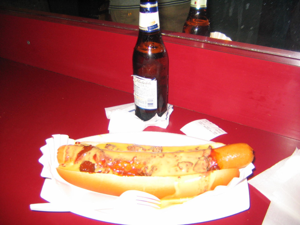

In [111]:
# testing the mapping

test_img = modified_train_set[600]['images']
test_img.thumbnail((300,300))
test_img

### Processing of Validation Set

In [112]:
questionList_val = []
answerList_val = []
imgList_val = []

In [113]:
val_json[2]['image_id']

1018

In [114]:
for i in tqdm(range(len(val_json))):
    
    pointer = val_json[i]
    
    questionList_val.append(pointer['question'])
    answerList_val.append(pointer['answer'])
    imgList_val.append(pointer['image_id'])

100%|█████████████████████████████████████| 43112/43112 [00:00<00:00, 457211.43it/s]


In [115]:
len(questionList_val), len(answerList_val), len(imgList_val)

(43112, 43112, 43112)

In [116]:
imgPathList_val = []
filepath = '/home/aritra/cric/images/img/'

for i in tqdm(range(len(imgList_val))):
    
    imgName = str(imgList_val[i]) + '.jpg'
    concatedPath = os.path.join(filepath,imgName)
    
    imgPathList_val.append(concatedPath)

100%|█████████████████████████████████████| 43112/43112 [00:00<00:00, 345021.69it/s]


In [117]:
imgPathList_val[0:5]

['/home/aritra/cric/images/img/1003.jpg',
 '/home/aritra/cric/images/img/1003.jpg',
 '/home/aritra/cric/images/img/1018.jpg',
 '/home/aritra/cric/images/img/1018.jpg',
 '/home/aritra/cric/images/img/1018.jpg']

In [118]:
# creating HF dataset to map images fast of Val_set

listToDictionary = {'questions':questionList_val, 'labels':answerList_val, 'images':imgPathList_val}
modified_val_set = Dataset.from_dict(listToDictionary)

In [119]:
# mapping each filepath of Val Set to images in the directory

modified_val_set = modified_val_set.cast_column("images", datasets.Image())

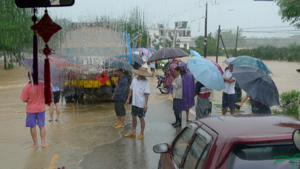

In [120]:
# testing the mapping of Val Set

test_img = modified_val_set[600]['images']
test_img.thumbnail((300,300))
test_img

##### End of Processing

In [121]:
from transformers import ViltProcessor, ViltForQuestionAnswering

In [122]:
from transformers import ViltConfig
config = ViltConfig.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [123]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [143]:
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm", id2label = reverse_mapping, label2id = mapping).to(device)

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.3.weight', 'classifier.1.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.1.weight', 'classifier.0.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [144]:
from torch.utils.data import DataLoader
from datasets import Dataset

In [151]:
class cric_dataset(Dataset):
    
    def __init__(self, dataset, processor):
        self.processor = processor
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self,idx):
                
        item = self.dataset[idx]
        
        encodings = self.processor(images = item["images"], text = item["questions"], padding="max_length", truncation=True, return_tensors = "pt")
        encodings = {k:v.squeeze() for k,v in encodings.items()}

        labels = item['answers']
        scores = item['scores']
        
        targets = torch.zeros(len(mapping))        
        
        for label, score in zip(labels, scores):
            targets[label] = torch.tensor(score)
        
        encodings["labels"] = targets

        return encodings

In [152]:
train_dataset_object = cric_dataset(modified_train_set, processor)

In [158]:
def collate_fn(batch):
  
    input_ids = [item['input_ids'] for item in batch]
    pixel_values = [item['pixel_values'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    token_type_ids = [item['token_type_ids'] for item in batch]
    labels = [item['labels'] for item in batch]

    # create padded pixel values and corresponding pixel mask
    
    encoding = processor.image_processor.pad(pixel_values, return_tensors="pt")

    # create new batch
    
    batch = {}
    
    batch['input_ids'] = torch.stack(input_ids)
    batch['attention_mask'] = torch.stack(attention_mask)
    batch['token_type_ids'] = torch.stack(token_type_ids)
    batch['pixel_values'] = encoding['pixel_values']
    batch['pixel_mask'] = encoding['pixel_mask']
    batch['labels'] = torch.stack(labels)

    return batch


In [159]:
train_dataloader = DataLoader(train_dataset_object, collate_fn = collate_fn, shuffle = True, batch_size = 4)

In [160]:
batch = next(iter(train_dataloader))

for k,v in batch.items():
  print(k, v.shape)

print(len(train_dataloader))

print(batch.keys())

input_ids torch.Size([4, 40])
attention_mask torch.Size([4, 40])
token_type_ids torch.Size([4, 40])
pixel_values torch.Size([4, 3, 384, 512])
pixel_mask torch.Size([4, 384, 512])
labels torch.Size([4])
91309
dict_keys(['input_ids', 'attention_mask', 'token_type_ids', 'pixel_values', 'pixel_mask', 'labels'])


In [161]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

model.train()

for epoch in range(5):  # loop over the dataset multiple times

    print(f"Epoch: {epoch}")

    for batch in tqdm(train_dataloader):
        # get the inputs;
        batch = {k:v.to(device) for k,v in batch.items()}

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(**batch)
        
        loss = outputs.loss
        
        print("Loss:", loss.item())
        
        loss.backward()
        optimizer.step()

Epoch: 0


  0%|                                                     | 0/91309 [00:00<?, ?it/s]


ValueError: Target size (torch.Size([4])) must be the same as input size (torch.Size([4, 1443]))